# Case Study 1 : Collecting Data from Twitter

Due Date: September 22, **before the beginning of class at 6:00pm**

* ------------

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Hang Ding
    Fangling Zhang
    Qingquan Zhao
    Yihao Zhou
    Tongge Zhu
   

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://www.learndatasci.com/wp-content/uploads/2015/08/Mining-the-Social-Web-2nd-Edition.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in：The topice we selected is " iPhone 7 "
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [5]:
import twitter
import sys
import io
import json
import os

def oauth_login():
 
    CONSUMER_KEY = 'q1dGO5xX1BmI5HoJvACvKszmP'
    CONSUMER_SECRET ='3sEYfZqNNHSemuRHs7AzebhUDI793vU6c2UT6SiTUZS5gczAgB'
    OAUTH_TOKEN = '211554454-s9NidIvGRF7q28YC1dM53lio831g3InJtdkYsAUb'
    OAUTH_TOKEN_SECRET = 'VnqBUvPcxcPbIAVaqSsTLMTeRdyrO31jxQZrYXLbsHu9l'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitter_api = oauth_login()

#Just for check if the token works
print(twitter_api)


### Report some statistics about the tweets you collected 

* The topic of interest: < iPhone 7>


* The total number of tweets collected:  < INSERT THE NUMBER HERE>

In [3]:
# collect streaming data from twitter

q = 'iphone 7, Iphone7, iphone7, Iphone 7' 

twitter_api = oauth_login()

twitter_stream = twitter.TwitterStream(auth=twitter_api.auth)

stream = twitter_stream.statuses.filter(track=q)

def save_json(filename, data):
    with io.open(filename,'a+', encoding='utf-8') as f:
        f.write(json.dumps(data, indent=3))
        f.write(',\n')

        
# Below codes are saving stream data to a file
#‘文件名格式’=‘mm_dd_name_begin time_ending time'
for tweet in stream:
    save_json('09_16_tzhu_1245-1255.json', tweet)
    
# The interruption is intentional, we don't want to reach the API limited


KeyboardInterrupt: 

In [1]:
#check the # of tweets

import twitter, json
def load_data(filename):
    f = open(filename,'r', encoding='utf-8').read()
    content_json = json.loads(f)
    return content_json

#Data collection Between Sept 16, 09:00-10:00 EST
content_json09_10 = load_data('combined_9_10_0916.json')

#Data collection Between Sept 16, 10:00-11:00 EST
content_json10_11 = load_data('combined_10_11_0916.json')

#Data collection Between Sept 16, 11:00-12:00 EST
content_json12_13 = load_data('combined_11_12_0916.json')


content_json_all = load_data('combined_all.json')


print("# of Tweets between Sept 16, 09:00-10:00 EST: ", len(content_json09_10))
print("# of Tweets between Sept 16, 10:00-11:00 EST: ", len(content_json10_11))
print("# of Tweets between Sept 16, 11:00-12:00 EST: ", len(content_json12_13))
print("Total # of Tweets: " ,len(content_json_all))

# of Tweets between Sept 16, 09:00-10:00 EST:  24000
# of Tweets between Sept 16, 10:00-11:00 EST:  21135
# of Tweets between Sept 16, 11:00-12:00 EST:  22301
Total # of Tweets:  67436


*-----------------------

# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [5]:
#----------------------------------------------
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import json
from collections import OrderedDict
import string
from prettytable import PrettyTable

def unwanted():
    unwanted = list(stopwords.words('english'))
    unwanted += list(string.punctuation)
    unwanted += ['https', 'http', '...', '…',"''",'``','iphone', 'Iphone', 'iphone7', 'Iphone7',"'s"]
    return unwanted 

def frequent_words(data, n):
    unwanted_words = unwanted()
    counts = dict() # {"word1": 253, "word2": 13}
    for tweet in data:
        if "text" in tweet.keys() and tweet["lang"]=="en":
            sentence = tweet["text"]
            words = word_tokenize(sentence)
            for word in words:
                if word.lower() not in unwanted_words:
                    counts[word] = counts.get(word, 0)+1
    sorted_counts = sorted(counts.items(), key=lambda t: t[1], reverse = True)
    with open("frequency.txt", 'w', encoding='utf-8') as f:
        f.write(str(sorted_counts[:n]))
    return sorted_counts[:n]


tweets_all = load_data("combined_all.json")

frequent_words_tweets_all = frequent_words(tweets_all, 30)

pt_word_frequency = PrettyTable(field_names = ['Words', 'Frequency'])
[pt_word_frequency.add_row(row) for row in frequent_words_tweets_all]

print(pt_word_frequency)



+-----------+-----------+
|   Words   | Frequency |
+-----------+-----------+
|     7     |   22146   |
|     RT    |   12890   |
|   Apple   |    4431   |
|    Plus   |    3362   |
|    get    |    3320   |
|    new    |    3094   |
|    n't    |    2325   |
|   today   |    1298   |
|    got    |    1293   |
|     go    |    1217   |
|   phone   |    1164   |
| headphone |    1121   |
|    amp    |    1119   |
|    jack   |    1089   |
|    come   |    1080   |
|    one    |    1015   |
|    case   |    914    |
| BlakeGray |    882    |
|  already  |    878    |
|    bed    |    875    |
|     'm    |    854    |
|    day    |    822    |
|    via    |    813    |
|    buy    |    808    |
|     us    |    801    |
|     6s    |    777    |
|   Black   |    776    |
|    rage   |    768    |
|    New    |    748    |
|   people  |    736    |
+-----------+-----------+


**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [5]:
#Finding the Most Popular Tweets in a Collection of Tweets

#     # You could also consider using the favorite_count parameter as part of 
#     # this  heuristic, possibly using it to provide an additional boost to 
#     # popular tweets in a ranked formulation
        
#     return [ status for status in statuses if status['retweet_count'] > retweet_threshold ] 

def popular_tweet(statuses, n):
	popular = []
	for tweet in statuses:
		if "retweet_count" in tweet.keys() and tweet["retweet_count"] > n:
			popular.append(tweet)
	return popular

def popular_retweeted_count(statuses, n):
	popular = {}
	for tweet in statuses:
		if "retweeted_status" in tweet.keys() and len(tweet["retweeted_status"])!=0	and tweet["lang"] == "en" \
			and "retweet_count" in tweet["retweeted_status"].keys():
				if tweet["retweeted_status"]["retweet_count"] > n and "text" in tweet.keys() and len(tweet["text"])!=0:
					if tweet["text"] not in popular.values(): 
						popular[tweet["retweeted_status"]["retweet_count"]] = tweet["text"]
	sorted_popular = sorted(popular.items(), key=lambda t: t[0], reverse = True)
	return sorted_popular

content = load_data('combined_all.json')

# popular_tweet_list = popular_tweet(content, 1)
popular_retweeted_count = popular_retweeted_count(content, 5000)
for tweet in sorted(popular_retweeted_count, reverse=True):
	print("retweeted_number: ", tweet[0], "\t","tweet_text: ", tweet[1])


retweeted_number:  58118 	 tweet_text:  RT @youtoofunny: iPhone 7 😱 

http://t.co/LMB7UrhLHx
retweeted_number:  39074 	 tweet_text:  RT @Iemonade: apple: the iphone 7 is fireproof, waterproof &amp; flies

us: but better chargers &amp; group facetime?

apple: https://t.co/qGoMRCGO…
retweeted_number:  16874 	 tweet_text:  RT @ShaydaWayda: $170 for iPhone 7 earphones?them hoes better be good,everytime I hear a gunshot in a song I better be ducking and checking…
retweeted_number:  9247 	 tweet_text:  RT @pranavsapra: iPhone 6S - Great camera
iPhone 7 - 2 Cameras
iPhone 7S - 2 Great cameras
iPhone 8 - 3 Cameras
iPhone 8S - 3 Great cameras…
retweeted_number:  8534 	 tweet_text:  RT @TooDopeWithHope: Won't believe it till them rich white people on YouTube buy one and do a test https://t.co/GLwvKLfSfN
retweeted_number:  8252 	 tweet_text:  RT @brgEXTRAsjk: iphone 7 official video by apple https://t.co/3dnOufm2pH
retweeted_number:  7899 	 tweet_text:  RT @BillRatchet: if the iPhone 7 doesn't co

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [1]:
import twitter
import sys
import io
import json
import os
from prettytable import PrettyTable

def load_data(filename):
    f = open(filename,'r', encoding='utf-8').read()
    content_json = json.loads(f)
    return content_json

def count_tweet_hashtags_user_mentions(statuses):
	hashtags, user_mentions= {}, {}
	for tweet in statuses:
		if "entities" in tweet.keys() and len(tweet["entities"])!=0:
			if "hashtags" in tweet["entities"] and len(tweet["entities"]["hashtags"])!=0:
				for hashtag in tweet["entities"]["hashtags"]:
					hashtags[hashtag["text"]] = hashtags.get(hashtag["text"], 0)+1			
			if "user_mentions" in tweet["entities"] and len(tweet["entities"]["user_mentions"])!=0:
				for user_mension in tweet["entities"]["user_mentions"]:
					user_mentions[user_mension['screen_name']] = user_mentions.get(user_mension['screen_name'],0)+1
	top_10_hashtags = sorted(hashtags.items(), key=lambda t: t[1], reverse=True)[:10]
	top_10_user_mentions = sorted(user_mentions.items(), key=lambda t: t[1], reverse=True)[:10]
	return top_10_hashtags, top_10_user_mentions



content = load_data('combined_9_10_0916.json')
hashtags, user_mentions = count_tweet_hashtags_user_mentions(content)

pt_hashtags = PrettyTable(field_names = ['Top 10 hashtags', 'hashtags #'])
[ pt_hashtags.add_row(row) for row in hashtags]
pt_user_mentions = PrettyTable(field_names = ['Top 10 user_mentions', 'user_mentions #'])
[ pt_user_mentions.add_row(row) for row in user_mentions]

print(pt_hashtags)
print(pt_user_mentions)



+-------------------+------------+
|  Top 10 hashtags  | hashtags # |
+-------------------+------------+
|      iPhone7      |    3655    |
|     iPhone7TH     |    1309    |
|    stockmarket    |    831     |
|       APPLE       |    754     |
| differentisbetter |    743     |
|   Coffee4Hospice  |    743     |
|       invest      |    743     |
|       Coffee      |    743     |
|    chartattack    |    743     |
| Hawkers38HiPhone7 |    341     |
+-------------------+------------+
+----------------------+-----------------+
| Top 10 user_mentions | user_mentions # |
+----------------------+-----------------+
|       imtaiki        |       1879      |
|       khajochi       |       1280      |
|     SqeezeReport     |       743       |
|       YouTube        |       406       |
|    chaochao_peep     |       397       |
|    BrianRoemmele     |       388       |
|      HawkersCo       |       289       |
|      LUHANLAND       |       270       |
|     ohmydeer0420     |       249   

* ------------------------

# Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "Iemonade". 
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [6]:
import twitter
import json
import os
from functools import partial
from sys import maxsize
import sys
import time
from urllib.error import URLError 
from http.client import BadStatusLine


def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw):
	def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
		if wait_period > 3600: # Seconds
			print >> sys.stderr, 'Too many retries. Quitting.'
			raise e
		if e.e.code == 401:
			print >> sys.stderr, 'Encountered 401 Error (Not Authorized)'
			return None
		elif e.e.code == 404:
			print >> sys.stderr, 'Encountered 404 Error (Not Found)'
			return None
		elif e.e.code == 429:
			print >> sys.stderr, 'Encountered 429 Error (Rate Limit Exceeded)'
			if sleep_when_rate_limited:
				print >> sys.stderr, "Retrying in 15 minutes...ZzZ..."
				sys.stderr.flush()
				time.sleep(60*15 + 5)
				print >> sys.stderr, '...ZzZ...Awake now and trying again.'
				return 2
			else:
				raise e # Caller must handle the rate limiting issue
		elif e.e.code in (500, 502, 503, 504):
			print >> sys.stderr, 'Encountered %i Error. Retrying in %i seconds' % \
					(e.e.code, wait_period)
			time.sleep(wait_period)
			wait_period *= 1.5
			return wait_period
		else:
			raise e
	wait_period = 2
	error_count = 0
	while True:
		try:
			return twitter_api_func(*args, **kw)
		except twitter.api.TwitterHTTPError as e:
			error_count = 0
			wait_period = handle_twitter_http_error(e, wait_period)
			if wait_period is None:
				return
		except URLError as e:
			error_count += 1
			print >> sys.stderr, "URLError encountered. Continuing."
			if error_count > max_errors:
				print >> sys.stderr, "Too many consecutive errors...bailing out."
				raise
		except BadStatusLine as e:
			error_count += 1
			print >> sys.stderr, "BadStatusLine encountered. Continuing."
			if error_count > max_errors:
				print >> sys.stderr, "Too many consecutive errors...bailing out."
				raise


def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None, friends_limit=maxsize, followers_limit=maxsize):

	# Must have either screen_name or user_id (logical xor)
	assert (screen_name != None) != (user_id != None), \
	"Must have screen_name or user_id, but not both"

	get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids, count=5000)
	get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids, count=5000)

	friends_ids, followers_ids = [], []

	for twitter_api_func, limit, ids, label in [
				[get_friends_ids, friends_limit, friends_ids, "friends"], 
					[get_followers_ids, followers_limit, followers_ids, "followers"]
				]:
		
		if limit == 0: continue
			
		cursor = -1
		while cursor != 0:
			# Use make_twitter_request via the partially bound callable...
			if screen_name: 
				response = twitter_api_func(screen_name=screen_name, cursor=cursor)
			else: # user_id
				response = twitter_api_func(user_id=user_id, cursor=cursor)

			if response is not None:
				ids += response['ids']
				cursor = response['next_cursor']

			print('Fetched {0} total {1} ids for {2}'.format(len(ids),label, (user_id or screen_name)))


	return friends_ids[:friends_limit], followers_ids[:followers_limit]


def save_json(fname, data):
	a = []
	if not os.path.isfile(fname):
	    a.append(data)
	    with open(fname, mode='w') as f:
	        f.write(json.dumps(a, indent=2))
	else:
	    with open(fname) as feedsjson:
	        feeds = json.load(feedsjson)
	    feeds.append(data)
	    with open(fname, mode='w') as f:
	        f.write(json.dumps(feeds, indent=2))


twitter_api = oauth_login()

friends_ids, followers_ids = get_friends_followers_ids(twitter_api, 
                                                       screen_name="Iemonade", 
                                                       friends_limit=5, 
                                                       followers_limit=5)

for friend_id in friends_ids:
	friend_info = twitter_api.users.lookup(user_id = friend_id)
	save_json("Iemonade_friends_info.json", friend_info)


for follower_id in followers_ids:
	follower_info = twitter_api.users.lookup(user_id = follower_id)
	save_json("Iemonade_followers_info.json", follower_info)

Fetched 239 total friends ids for Iemonade
Fetched 5000 total followers ids for Iemonade
Fetched 6093 total followers ids for Iemonade


* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [11]:
from prettytable import PrettyTable

def load_data(filename):
	f = open(filename,'r', encoding='utf-8').read()
	content_json = json.loads(f)
	return content_json

friends = load_data("Iemonade_friends_info.json")
followers = load_data("Iemonade_followers_info.json")
print(len(friends))
print(len(followers))

friends_ids_names = [	(friend[0]['id'], friend[0]["screen_name"])
						for friend in friends[:20]	]

followers_ids_names = [	(follower[0]['id'], follower[0]["screen_name"])
						for follower in followers[:20]	]

pt_friends = PrettyTable(field_names = ['friend_id', 'friend_name'])
[ pt_friends.add_row(row) for row in friends_ids_names]
pt_followers = PrettyTable(field_names = ['follower_id', 'follower_name'])
[ pt_followers.add_row(row) for row in followers_ids_names]

print(pt_friends)
print(pt_followers)

183
5
+------------+-----------------+
| friend_id  |   friend_name   |
+------------+-----------------+
| 286431876  |  TheBeyHiveTeam |
| 3343590497 |  krystalschrist |
| 1217760914 |   ManPhatties   |
| 714807331  |  chrisdeleonnnn |
| 908150251  |   britneyvibes  |
|  52156378  |     seIenas     |
| 701737694  |   popstylebey   |
| 2492048386 |    alexernst7   |
| 2783323392 |    kuntyewest   |
| 803063040  |    BADDlEWILL   |
| 2361817963 |  theIifeofpabIo |
| 2562412738 |    hxrrygomez   |
| 2727537393 |     fvckbas     |
| 613756987  |     byetyler    |
| 176895122  |    BeyonceWeb   |
|  40542633  |     thugIyfe    |
| 1033556185 |    fentycunti   |
| 783598064  |   MADBLACKTHOT  |
| 561837494  |   SHARONShaie   |
| 3032103930 |    beyupdate    |
| 3241679456 |    fentydeco    |
| 2735447973 |    coralesque   |
| 2663611406 |    digitaIdad   |
| 169536317  |     dvrrxll     |
| 418363187  |     maycesus    |
|  56783491  |    nickjonas    |
| 2732074569 | sophiaaaamariee |
| 24

*------------------------

# Problem 4: Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

Question: what is the attitude of people toward new iPhone 7/7plus and it's new features?

In [ ]:
# code for draw pie plot
import matplotlib.pyplot as plt


def generic_bar_plot(D, num_shown=5, xlabel="", ylabel="", title=""):
	sorted_D = sorted(D.items(), key=lambda t: t[1], reverse=True)
	print(sorted_D)
	x, y = [], []
	for pair in sorted_D[:num_shown]:
		x.append(pair[0])
		y.append(pair[1])
	plt.bar(range(len(y)), y, align='center', width=0.5)
	plt.xticks(range(len(x)), x)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.title(title)
	plt.show()

def generic_pie_plot(D, num_shown=5, include_others=True,
					startangle=90,shadow=True, autopct='%1.1f%%', 
					xlabel=None, ylabel=None, title=None):
	sorted_D = sorted(D.items(), key=lambda t: t[1], reverse=True)
	print(sorted_D)
	colors = ['#87ceeb','#ffa500','#ff4500','b','g']*5
	colors = colors[:num_shown]
	labels = []
	slices = []
	explode = [0.1]+[0]*(num_shown-1)
	if include_others == True:
		sum_total = 0
		for pair in sorted_D:
			sum_total += pair[1]
		shown_total = 0
		for pair in sorted_D[:num_shown-1]:
			labels.append(pair[0])
			slices.append(pair[1])
			shown_total += pair[1]
		labels.append('Others')
		slices.append(sum_total-shown_total)
	else:
		for pair in sorted_D[:num_shown]:
			labels.append(pair[0])
			slices.append(pair[1])
	plt.pie(slices,labels=labels,colors = colors,startangle = startangle, 
				shadow = True, explode = explode, autopct = autopct)
	if xlabel==None and ylabel==None and title==None:
		plt.show()
	elif xlabel==None and ylabel==None:
		plt.title(title)
		plt.show()
	else:
		plt.xlabel(xlabel)
		plt.ylabel(ylabel)
		plt.title(title)
		plt.show()


def number_bar_plot(D, xlabel="", ylabel="", title=""):
	sorted_D = sorted(D.items(), key=lambda t: t[0])
	print(sorted_D)
	x, y = [], []
	for pair in sorted_D:
		x.append(pair[0])
		y.append(pair[1])
	plt.bar(x, y, align='center', width=0.5)
	plt.title(title)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.show()


In [7]:
#Generate word libraries of positive words and negative words, respectively

from nltk.corpus import twitter_samples, stopwords
import string

negative_tweets_abs = twitter_samples.abspath("negative_tweets.json")
positive_tweets_abs = twitter_samples.abspath("positive_tweets.json")
negative_word_tokenized = twitter_samples.tokenized(negative_tweets_abs)
positive_word_tokenized = twitter_samples.tokenized(positive_tweets_abs)

def unwanted():
	unwanted = list(stopwords.words('english'))
	unwanted += list(string.punctuation)
	return unwanted 

unwanted_words_list = unwanted()

def clean_up_word_set(ls):
	word_set = []
	for l in ls:
		for word in l:
			if word not in unwanted_words_list and word not in word_set:
				word_set.append(word)
	return word_set

negative_words = clean_up_word_set(negative_word_tokenized)
positive_words = clean_up_word_set(positive_word_tokenized)

with open("negative_words_cleaned.json", "w", encoding='utf-8') as f_neg:
	f_neg.write(json.dumps(negative_words, indent=3))

with open("positive_words_cleaned.json", "w", encoding='utf-8') as f_pos:
	f_pos.write(json.dumps(positive_words, indent=3))


Populating the interactive namespace from numpy and matplotlib
[('negative', 14094), ('neutral', 14094), ('positive', 9059)]


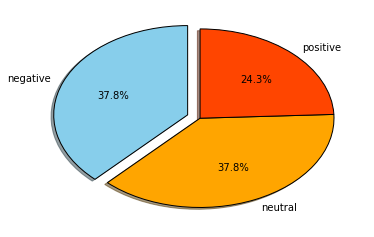

In [10]:
#analysis attitude of all tweets by using the aboved two libraries
import matplotlib.pyplot as plt
from TwitterPlot import generic_pie_plot
%pylab inline

def estimate_features(data, negative_words, positive_words):
	data_strings = []
	for tweet in data:
		if "lang" in tweet.keys() and tweet["lang"]=="en" and "text" in tweet.keys() and len(tweet["text"])!=0:
			data_strings.append(tweet["text"])
	scores_map = {}
	for sentence in data_strings:
		score = 0
		words_list = word_tokenize(sentence)
		for word in words_list:
			if word in negative_words:
				score -= 1
			if word in positive_words:
				score += 1
		scores_map[score] = scores_map.get(score, 0) + 1
	sorted_scores = sorted(scores_map.items(), key=lambda t: t[0], reverse=True)
	return sorted_scores

def positive_negative_map(score_map):
	p_n_map = {"positive":0, "negative":0, "neutral":0}
	for pair in score_map:
		if pair[0]>0:
			p_n_map["positive"] += pair[1]
		elif pair[0] == 0:
			p_n_map["neutral"] += pair[1]

			p_n_map["negative"] += pair[1]
	return p_n_map


negative_words = load_data("negative_words_cleaned.json")
positive_words = load_data("positive_words_cleaned.json")
data_strings = load_data("combined_all.json")

score_map = estimate_features(data_strings, negative_words, positive_words)
p_n_map = positive_negative_map(score_map)
generic_pie_plot(p_n_map, num_shown=3, include_others=False)

Populating the interactive namespace from numpy and matplotlib
[('neutral', 273), ('positive', 191), ('negative', 49)]


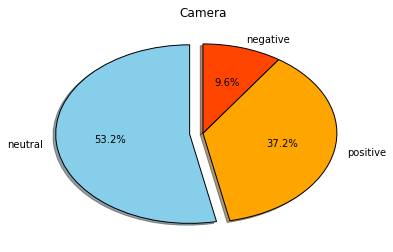

In [5]:
from nltk.tokenize import word_tokenize
import json
from nltk.corpus import twitter_samples, stopwords
import string
from TwitterPlot import generic_pie_plot, number_bar_plot
import matplotlib.pyplot as plt
%pylab inline

def load_data(filename):
    f = open(filename,'r', encoding='utf-8').read()
    content_json = json.loads(f)
    return content_json

def estimate_keyword_features(data, keywords_lst, negative_words, positive_words):
	data_strings = []
	for tweet in data:
		if "lang" in tweet.keys() and tweet["lang"]=="en" and "text" in tweet.keys() and len(tweet["text"])!=0:
			to_be_added = ""
			for keyword in keywords_lst:
				if keyword.lower() in tweet['text'].lower() and tweet["text"]!= to_be_added:
					to_be_added = tweet["text"]
			if to_be_added != "":
				data_strings.append(to_be_added)
	scores_map = {}
	for sentence in data_strings:
		score = 0
		words_list = word_tokenize(sentence)
		for word in words_list:
			if word in negative_words:
				score -= 1
			if word in positive_words:
				score += 1
		scores_map[score] = scores_map.get(score, 0) + 1
	sorted_scores = sorted(scores_map.items(), key=lambda t: t[0], reverse=True)
	return sorted_scores

def positive_negative_plot(lst, title):
	p_n_map = {"positive":0, "negative":0, "neutral":0}
	for pair in lst:
		if pair[0]>0:
			p_n_map["positive"] += pair[1]
		elif pair[0] == 0:
			p_n_map["neutral"] += pair[1]
		else:
			p_n_map["negative"] += pair[1]
	generic_pie_plot(p_n_map, num_shown=3, include_others=False, title=title)

negative_words = load_data("negative_words_cleaned.json")
positive_words = load_data("positive_words_cleaned.json")
data_strings = load_data("combined_all.json")
query_jetblack = ["jet black", "jet", "black"]
query_earphone = ["earphone", "ear phone", "headphone", "lightning", "3.5"]
query_waterproof = ["water", "waterproof", "swim"]
query_camera = ["camera", "double", "dual", "zoom"]


camera = estimate_keyword_features(data_strings, query_camera, negative_words, positive_words)
positive_negative_plot(camera, title="Camera")


[('negative', 732), ('neutral', 556), ('positive', 431)]


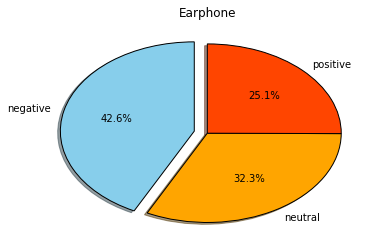

In [6]:
earphone = estimate_keyword_features(data_strings, query_earphone, negative_words, positive_words)
positive_negative_plot(earphone, title="Earphone")


[('neutral', 389), ('positive', 258), ('negative', 41)]


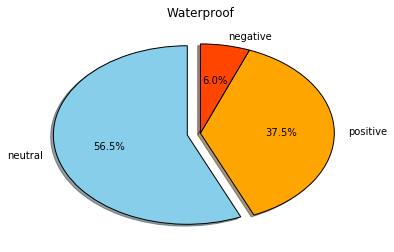

In [7]:

waterproof = estimate_keyword_features(data_strings, query_waterproof, negative_words, positive_words)
positive_negative_plot(waterproof, title="Waterproof")


[('positive', 717), ('neutral', 287), ('negative', 205)]


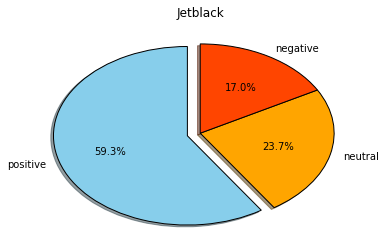

In [11]:

jetblack = estimate_keyword_features(data_strings, query_jetblack, negative_words, positive_words)
positive_negative_plot(jetblack, title="Jetblack")


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Wen Liu (wliu3@wpi.edu).
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 120 **


---------------------------------------------------------------------------
** Notebook:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API.  Come up with a business question and describe how Twitter data can help you answer that question.




---------------------------------------------------------------------------
** Report: communicate the results**
    Points: 20

(1) What data you collected?
    Points: 5 

(2) Why this topic is interesting or important to you? (Motivations)
    Points: 5 

(3) How did you analyse the data?
    Points: 5 

(4) What did you find in the data?
(please include figures or tables in the report, but no source code)
    Points: 5 



---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

